In [1]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns

In [2]:
df= pd.read_csv('TensorFlow_FILES/TensorFlow_FILES/DATA/fake_reg.csv'
            )

In [ ]:
import tensorflow as tf

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


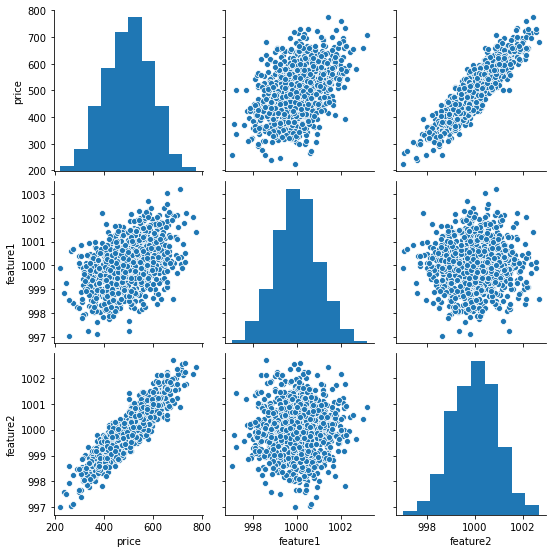

In [8]:
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

# Normalizing/Scaling the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

# Creating a Model¶

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

# Training

In [25]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 3s 5ms/sample - loss: 256545.0453
Epoch 2/250
700/700 [==============================] - 0s 87us/sample - loss: 256381.4599
Epoch 3/250
700/700 [==============================] - 0s 67us/sample - loss: 256212.4541
Epoch 4/250
700/700 [==============================] - 0s 66us/sample - loss: 256024.5328
Epoch 5/250
700/700 [==============================] - 0s 90us/sample - loss: 255814.2616
Epoch 6/250
700/700 [==============================] - 0s 91us/sample - loss: 255576.9114
Epoch 7/250
700/700 [==============================] - 0s 79us/sample - loss: 255314.3487
Epoch 8/250
700/700 [==============================] - 0s 74us/sample - loss: 255022.0002
Epoch 9/250
700/700 [==============================] - 0s 80us/sample - loss: 254700.1279
Epoch 10/250
700/700 [==============================] - 0s 71us/sample - loss: 254348.8998
Epoch 11/250
700/700 [==============================] - 0s 81us/sample - loss: 

Epoch 91/250
700/700 [==============================] - 0s 83us/sample - loss: 1537.6114
Epoch 92/250
700/700 [==============================] - 0s 74us/sample - loss: 1512.0165
Epoch 93/250
700/700 [==============================] - 0s 60us/sample - loss: 1480.1671
Epoch 94/250
700/700 [==============================] - 0s 61us/sample - loss: 1456.2813
Epoch 95/250
700/700 [==============================] - 0s 71us/sample - loss: 1433.5270
Epoch 96/250
700/700 [==============================] - 0s 76us/sample - loss: 1405.0534
Epoch 97/250
700/700 [==============================] - 0s 71us/sample - loss: 1378.5581
Epoch 98/250
700/700 [==============================] - 0s 91us/sample - loss: 1351.7864
Epoch 99/250
700/700 [==============================] - 0s 89us/sample - loss: 1327.0384
Epoch 100/250
700/700 [==============================] - 0s 73us/sample - loss: 1301.2456
Epoch 101/250
700/700 [==============================] - 0s 77us/sample - loss: 1274.1342
Epoch 102/250
700/7

Epoch 183/250
700/700 [==============================] - 0s 89us/sample - loss: 43.9163
Epoch 184/250
700/700 [==============================] - 0s 64us/sample - loss: 41.2285
Epoch 185/250
700/700 [==============================] - 0s 67us/sample - loss: 39.5532
Epoch 186/250
700/700 [==============================] - 0s 64us/sample - loss: 37.7771
Epoch 187/250
700/700 [==============================] - 0s 67us/sample - loss: 35.9223
Epoch 188/250
700/700 [==============================] - 0s 67us/sample - loss: 34.7028
Epoch 189/250
700/700 [==============================] - 0s 66us/sample - loss: 33.0740
Epoch 190/250
700/700 [==============================] - 0s 71us/sample - loss: 31.7069
Epoch 191/250
700/700 [==============================] - 0s 69us/sample - loss: 30.7314
Epoch 192/250
700/700 [==============================] - 0s 69us/sample - loss: 29.6561
Epoch 193/250
700/700 [==============================] - 0s 71us/sample - loss: 28.7843
Epoch 194/250
700/700 [=========

# Evaluation

In [26]:
model.history.history

{'loss': [256545.04526785715,
  256381.45991071427,
  256212.45410714287,
  256024.53276785713,
  255814.26160714286,
  255576.91142857142,
  255314.34866071428,
  255022.00017857144,
  254700.12785714286,
  254348.89982142858,
  253964.87017857144,
  253544.56410714285,
  253072.8824107143,
  252534.57660714287,
  251936.68991071428,
  251287.65919642858,
  250576.32821428572,
  249801.00982142857,
  248969.42919642857,
  248070.40723214287,
  247096.74830357142,
  246051.71705357142,
  244927.63651785714,
  243724.63276785714,
  242437.47875,
  241054.89276785715,
  239584.3300892857,
  238024.45089285713,
  236367.59866071428,
  234614.57982142858,
  232752.516875,
  230782.08866071427,
  228707.725,
  226524.44357142856,
  224213.8194642857,
  221786.14080357144,
  219236.97901785714,
  216571.88026785714,
  213778.57455357144,
  210840.15116071427,
  207778.54848214285,
  204593.36151785715,
  201261.535625,
  197811.53160714285,
  194231.82223214285,
  190503.3286607143,
  186643

In [27]:
loss = model.history.history['loss']

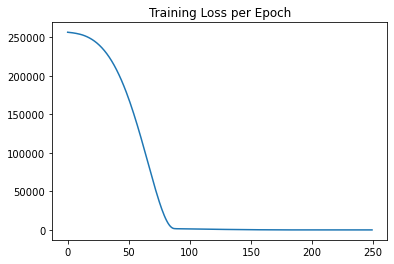

In [28]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [29]:
model.metrics_names

['loss']

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

23.819652513776507

In [32]:
test_score

25.503465194702148

In [33]:
test_predictions = model.predict(X_test)

In [34]:
test_predictions

array([[405.76184],
       [624.34717],
       [592.89417],
       [572.94794],
       [367.01593],
       [579.91675],
       [515.6806 ],
       [459.66772],
       [549.9318 ],
       [448.0632 ],
       [612.5757 ],
       [549.65186],
       [419.5923 ],
       [409.34436],
       [652.1061 ],
       [437.82446],
       [509.09412],
       [660.78394],
       [663.4464 ],
       [566.26135],
       [334.58377],
       [445.3661 ],
       [382.95868],
       [379.18707],
       [567.3145 ],
       [611.37317],
       [533.0565 ],
       [428.36853],
       [656.2933 ],
       [414.5725 ],
       [443.17105],
       [485.72302],
       [438.93863],
       [682.73987],
       [425.2688 ],
       [418.17194],
       [502.56262],
       [551.17206],
       [510.3562 ],
       [395.80164],
       [619.3945 ],
       [417.1221 ],
       [605.23047],
       [446.5043 ],
       [502.60992],
       [582.4741 ],
       [669.88965],
       [491.01132],
       [318.92413],
       [486.02167],


In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [37]:
test_predictions

0      405.761841
1      624.347168
2      592.894165
3      572.947937
4      367.015930
          ...    
295    529.701416
296    515.951050
297    610.439331
298    417.451263
299    411.351379
Length: 300, dtype: float32

In [38]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df.columns = ['Test Y','Model Predictions']

In [41]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.761841
1,624.156198,624.347168
2,582.455066,592.894165
3,578.588606,572.947937
4,371.224104,367.015930
...,...,...
295,525.704657,529.701416
296,502.909473,515.951050
297,612.727910,610.439331
298,417.569725,417.451263


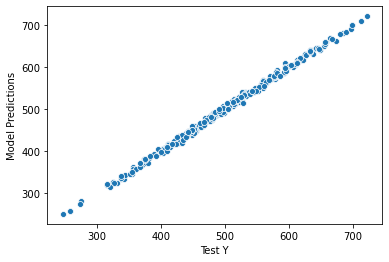

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

In [44]:
pred_df

,Test Y,Model Predictions,Error
0,402.296319,405.761841,-3.465522
1,624.156198,624.347168,-0.190970
2,582.455066,592.894165,-10.439099
3,578.588606,572.947937,5.640669
4,371.224104,367.015930,4.208173
...,...,...,...
295,525.704657,529.701416,-3.996759
296,502.909473,515.951050,-13.041576
297,612.727910,610.439331,2.288579
298,417.569725,417.451263,0.118461


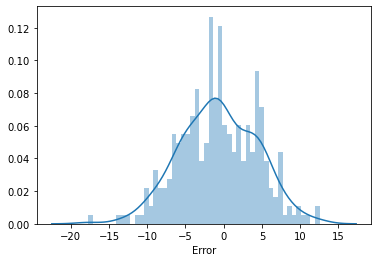

In [45]:
sns.distplot(pred_df['Error'],bins=50)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.0687105252600535

In [48]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.50346794923672

In [49]:
test_score

25.503465194702148

In [ ]:
# RMSE
test_score**0.5

# Predicting on brand new data

In [51]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [52]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [53]:
new_gem = scaler.transform(new_gem)

In [54]:
model.predict(new_gem)

array([[420.16852]], dtype=float32)

# Saving and Loading a Model

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [57]:
later_model = load_model('my_model.h5')

In [58]:
later_model.predict(new_gem)

array([[420.16852]], dtype=float32)